In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

__author__ = "Fabio Steven Tovar Ramos"
__version__ = "1.0"
__email__ = "fstovarr@unal.edu.co"
__title__ = "Chocolatina's album problem"

How many sheets on average should an agent buy to fill its album?

,distribution,time,sheets,id,friends,surplus,agents,full_agents,stage
0,exponential,51,10,0,0,42,2,1,buy
1,exponential,110,10,1,2,101,2,2,buy
2,exponential,18,10,2,8,12,10,1,exchange
3,exponential,19,10,9,9,14,10,2,buy
4,exponential,30,10,1,2,21,5,1,buy


In [8]:
r = [rg.get_int() for i in range(20000)]
plt.hist(r)
print(min(r))
print(max(r))

,time,sheets,id,friends,surplus,agents,full_agents
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,1356.779577,249.302615,10.356164,17.679950,1207.716065,20.617684,11.120797
std,1927.188986,238.364150,8.209244,11.677757,1815.949020,9.515418,8.367143
min,9.000000,10.000000,0.000000,0.000000,3.000000,2.000000,1.000000
25%,150.000000,50.000000,3.000000,9.000000,111.000000,10.000000,4.000000
50%,623.000000,200.000000,9.000000,16.000000,506.000000,20.000000,9.000000
75%,1757.000000,400.000000,16.000000,27.000000,1525.500000,30.000000,17.000000
max,18145.000000,700.000000,29.000000,48.000000,17446.000000,30.000000,30.000000


In [4]:
rg = RandomGenerator('exponential', 0, 699)
n = [rg.get_int() for i in range(2000)]
plt.hist(n)
print(max(n))
print(min(n))

## Data analysis

In [9]:
df = pd.read_csv("data/data.csv")
df.head()

,distribution,time,sheets,id,friends,surplus,agents,full_agents,stage
0,exponential,51,10,0,0,42,2,1,buy
1,exponential,110,10,1,2,101,2,2,buy
2,exponential,18,10,2,8,12,10,1,exchange
3,exponential,19,10,9,9,14,10,2,buy
4,exponential,30,10,1,2,21,5,1,buy


In [17]:
exp = df[df['distribution'] == 'exponential']
uni = df[df['distribution'] == 'uniform']

In [18]:
exp.describe()

,time,sheets,id,friends,surplus,agents,full_agents
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,1701.637295,231.086066,10.385246,17.870902,1563.930328,20.741803,11.104508
std,2247.989917,228.950486,8.214473,11.623709,2127.859178,9.376394,8.324732
min,12.000000,10.000000,0.000000,0.000000,6.000000,2.000000,1.000000
25%,184.750000,50.000000,3.000000,9.000000,154.750000,10.000000,4.000000
50%,942.000000,100.000000,9.000000,16.500000,844.500000,20.000000,9.000000
75%,2277.500000,400.000000,16.000000,27.000000,2077.500000,30.000000,17.000000
max,18145.000000,700.000000,29.000000,48.000000,17446.000000,30.000000,30.000000


In [19]:
uni.describe()

,time,sheets,id,friends,surplus,agents,full_agents
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,822.523810,277.523810,10.311111,17.384127,655.866667,20.425397,11.146032
std,1085.065305,250.013175,8.213999,11.773407,947.423332,9.738785,8.445645
min,9.000000,10.000000,0.000000,0.000000,3.000000,2.000000,1.000000
25%,128.500000,50.000000,3.000000,9.000000,82.500000,10.000000,4.000000
50%,437.000000,200.000000,8.000000,15.000000,330.000000,20.000000,9.000000
75%,1033.500000,400.000000,16.500000,26.500000,798.000000,30.000000,17.000000
max,6663.000000,700.000000,29.000000,48.000000,5964.000000,30.000000,30.000000


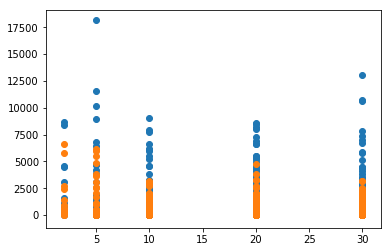

In [78]:
plt.scatter(exp['agents'], exp['time'])
plt.scatter(uni['agents'], uni['time'])

In [121]:
agents = df['agents'].unique()
distributions = df['distribution'].unique()
sheets = df['sheets'].unique()

In [134]:
agg = df[["time", "surplus", "agents", "distribution", "sheets"]].groupby(['agents', 'distribution', 'sheets'])
final = agg.mean()
final

time       surplus
agents distribution sheets                            
2      exponential  10         80.500000     71.500000
                    20        170.000000    151.000000
                    50        615.500000    566.500000
                    100       948.000000    849.000000
                    200      2333.000000   2134.000000
                    400      4512.500000   4113.500000
                    700      8522.500000   7823.500000
       uniform      10         16.000000      7.000000
                    50        212.000000    163.000000
                    100       571.500000    472.500000
                    200      1159.000000    960.000000
                    400      2537.500000   2138.500000
                    700      6201.500000   5502.500000
5      exponential  10        104.200000     95.200000
                    20        140.800000    121.800000
                    50        553.900000    504.900000
                    100      1047.200000    948.200000
                    200      2419.000000   2220.000000
                    400      4773.400000   4374.400000
                    700     11127.600000  10428.600000
       uniform      10         22.600000     13.600000
                    50        202.200000    153.200000
                    100       433.800000    334.800000
                    200      1178.200000    979.200000
                    400      2830.000000   2431.000000
                    700      5217.600000   4518.600000
10     exponential  10         61.300000     55.100000
                    20        118.857143    106.000000
                    50        321.823529    289.823529
                    100       947.800000    883.000000
...                                  ...           ...
       uniform      50        107.600000     76.200000
                    100       253.000000    190.222222
                    200       631.500000    507.400000
                    400      1210.600000    965.000000
                    700      2090.600000   1667.900000
20     exponential  10         47.111111     40.388889
                    20         86.133333     73.400000
                    50        347.722222    317.833333
                    100       620.947368    563.052632
                    200      1567.882353   1453.529412
                    400      2737.621622   2514.729730
                    700      5045.947368   4664.526316
       uniform      10         16.300000     11.600000
                    50         95.375000     66.375000
                    100       259.277778    203.055556
                    400      1107.833333    886.666667
                    700      1928.473684   1550.421053
30     exponential  10         66.500000     60.884615
                    20        101.375000     89.875000
                    50        315.851852    288.481481
                    100       657.320000    603.680000
                    200      1568.920000   1462.960000
                    400      2238.890909   2027.709091
                    700      4431.320000   4057.880000
       uniform      10         20.000000     14.625000
                    50         92.920000     66.680000
                    100       199.150000    144.500000
                    200       433.703704    328.962963
                    400       820.392857    612.035714
                    700      1477.107143   1108.142857

[64 rows x 2 columns]